In [1]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
# sns paper style
sns.set_theme(context="paper", style="whitegrid", font_scale=2.0)

## SongDescriber

In [3]:
ds = pd.read_csv("data/song_describer/song_describer.csv")
num_all_captions = ds["caption_id"].count()
num_all_tracks = ds["track_id"].nunique()
ds_all = ds.copy()
ds = ds[ds["is_valid_subset"].fillna(False)]

In [4]:
num_captions = ds["caption_id"].count()
print(f"Number of valid captions: {num_captions}")
print(f"Percentage of valid captions: {num_captions / num_all_captions * 100:.2f}%")

Number of valid captions: 746
Percentage of valid captions: 67.45%


In [5]:
num_tracks = ds["track_id"].nunique()
print(f"Number of tracks (valid subset): {num_tracks}")
print(f"Percentage of tracks (valid subset): {num_tracks / num_all_tracks * 100:.2f}%")

Number of tracks (valid subset): 547
Percentage of tracks (valid subset): 77.48%


In [6]:
per_track_freq = ds.groupby("track_id").count()["caption_id"]

In [7]:
per_track_freq.value_counts()

1    406
2     99
3     28
4     12
5      2
Name: caption_id, dtype: int64

<Axes: title={'center': 'Distribution of number of captions per track'}, xlabel='Number of captions', ylabel='Number of tracks'>

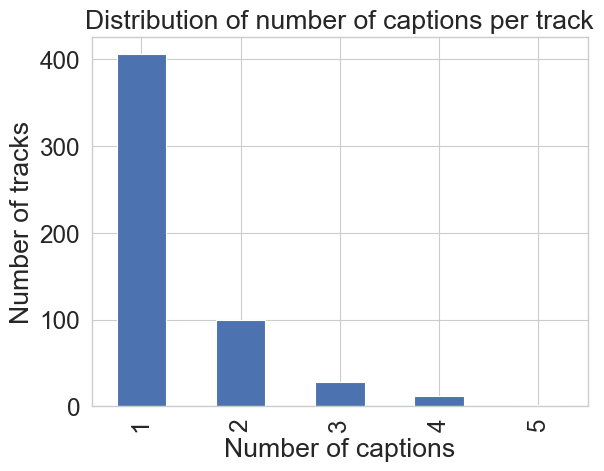

In [8]:
per_track_freq.value_counts().plot(kind="bar", title="Distribution of number of captions per track", xlabel="Number of captions", ylabel="Number of tracks")


In [9]:
print("Percentage of tracks with 1 caption: {:.2f}%".format(per_track_freq.value_counts()[1] / num_tracks * 100))

Percentage of tracks with 1 caption: 74.22%


In [10]:
ds["tokenized"] = ds["caption"].str.lower().apply(word_tokenize)
sentence_lengths = ds["tokenized"].apply(len)

In [11]:
sentence_lengths.describe()

count    746.00000
mean      18.22252
std        7.62749
min        8.00000
25%       13.00000
50%       16.00000
75%       22.00000
max       71.00000
Name: tokenized, dtype: float64

In [12]:
vocab_size = len(set([word for caption in ds["tokenized"] for word in caption]))
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 1942


In [13]:
ds_all["tokenized"] = ds_all["caption"].str.lower().apply(word_tokenize)
sentence_lengths = ds_all["tokenized"].apply(len)
print(sentence_lengths.describe())
vocab_size = len(set([word for caption in ds_all["tokenized"] for word in caption]))
print(f"Vocabulary size: {vocab_size}")

count    1106.000000
mean       21.688969
std        12.367342
min         8.000000
25%        13.000000
50%        18.000000
75%        26.000000
max       115.000000
Name: tokenized, dtype: float64
Vocabulary size: 2859


In [14]:
trigrams = [trigram for caption in ds["tokenized"] for trigram in zip(caption, caption[1:], caption[2:])]
print(f"Most common trigrams: {pd.Series(trigrams).value_counts().head(20)}")

Most common trigrams: (song, with, a)            53
(,, with, a)               30
(pop, song, with)          22
(track, with, a)           20
(rock, song, with)         19
(this, is, a)              18
(acoustic, guitar, and)    18
(in, the, background)      16
(guitar, and, a)           16
(an, acoustic, guitar)     15
(that, can, be)            15
(can, be, used)            14
(with, a, male)            14
(music, with, a)           13
(a, sense, of)             13
(a, male, voice)           12
(starts, with, a)          12
(and, a, male)             12
(by, a, male)              12
(a, male, vocalist)        11
dtype: int64


In [15]:
metadata_df = pd.read_csv("data/song_describer/song_describer_14_04_23.mtg-jamendo.tsv", sep="\t", names=["track",	"artist", "album",	"file",	"duration"] + [f"tag_{i}" for i in range(20)])
metadata_df["tags"] = metadata_df[[f"tag_{i}" for i in range(20)]].apply(lambda x: x.dropna().tolist(), axis=1)
metadata_df = metadata_df.drop(columns=[f"tag_{i}" for i in range(20)])
metadata_df["track_id"] = metadata_df["file"].str.split("/").str[1].str.split(".").str[0].astype(int)
metadata_df["valid_subset"] = metadata_df["track_id"].isin(ds["track_id"].unique())
metadata_df.head()

,track,artist,album,file,duration,tags,track_id,valid_subset
0,track_0000226,artist_000014,album_000031,26/226.mp3,222.8,[genre---metal],226,True
1,track_0003112,artist_000286,album_000485,12/3112.mp3,341.0,"[genre---electronic, genre---minimal]",3112,False
2,track_0003453,artist_000014,album_000545,53/3453.mp3,242.4,[genre---metal],3453,True
3,track_0004880,artist_000696,album_000751,80/4880.mp3,214.8,"[genre---blues, genre---easylistening, genre--...",4880,True
4,track_0004883,artist_000696,album_000751,83/4883.mp3,249.5,"[genre---easylistening, genre---electronic, ge...",4883,True


In [16]:
metadata_df["valid_subset"].value_counts()

True     547
False    159
Name: valid_subset, dtype: int64

In [17]:
metadata_df.explode("tags")

,track,artist,album,file,duration,tags,track_id,valid_subset
0,track_0000226,artist_000014,album_000031,26/226.mp3,222.8,genre---metal,226,True
1,track_0003112,artist_000286,album_000485,12/3112.mp3,341.0,genre---electronic,3112,False
1,track_0003112,artist_000286,album_000485,12/3112.mp3,341.0,genre---minimal,3112,False
2,track_0003453,artist_000014,album_000545,53/3453.mp3,242.4,genre---metal,3453,True
3,track_0004880,artist_000696,album_000751,80/4880.mp3,214.8,genre---blues,4880,True
...,...,...,...,...,...,...,...,...
705,track_1418302,artist_455057,album_165502,02/1418302.mp3,202.4,instrument---ukulele,1418302,True
705,track_1418302,artist_455057,album_165502,02/1418302.mp3,202.4,mood/theme---love,1418302,True
705,track_1418302,artist_455057,album_165502,02/1418302.mp3,202.4,mood/theme---romantic,1418302,True
705,track_1418302,artist_455057,album_165502,02/1418302.mp3,202.4,mood/theme---uplifting,1418302,True


In [18]:
tags_df = metadata_df.explode("tags")
print(tags_df["tags"].head())
type_tag = pd.DataFrame(tags_df["tags"].str.split("---").tolist())
type_tag = type_tag.rename(columns={0: "type", 1: "tag"})
tags_df["type"] = type_tag["type"]
tags_df["tag"] = type_tag["tag"]
tags_df.drop(columns="tags", inplace=True)
tags_df.head()

0         genre---metal
1    genre---electronic
1       genre---minimal
2         genre---metal
3         genre---blues
Name: tags, dtype: object


,track,artist,album,file,duration,track_id,valid_subset,type,tag
0,track_0000226,artist_000014,album_000031,26/226.mp3,222.8,226,True,genre,metal
1,track_0003112,artist_000286,album_000485,12/3112.mp3,341.0,3112,False,genre,electronic
1,track_0003112,artist_000286,album_000485,12/3112.mp3,341.0,3112,False,genre,electronic
2,track_0003453,artist_000014,album_000545,53/3453.mp3,242.4,3453,True,genre,minimal
3,track_0004880,artist_000696,album_000751,80/4880.mp3,214.8,4880,True,genre,metal


In [19]:
#keep only top 10 tags per type

plot_data_valid = tags_df[tags_df["valid_subset"]].groupby("type").value_counts(["tag"]).reset_index(name="count")
plot_data_valid = plot_data_valid.groupby("type").head(10)
plot_data_all = tags_df.groupby("type").value_counts(["tag"]).reset_index(name="count")
plot_data_all = plot_data_all.groupby("type").head(10)
plot_data_valid["subset"] = "valid"
plot_data_all["subset"] = "all"
#concat both dataframes
plot_data = pd.concat([plot_data_valid, plot_data_all], axis=0)
plot_data

,type,tag,count,subset
0,genre,pop,293,valid
1,genre,electronic,177,valid
2,genre,easylistening,170,valid
3,genre,rock,159,valid
4,genre,soundtrack,88,valid
5,genre,classical,66,valid
6,genre,folk,64,valid
7,genre,alternative,60,valid
8,genre,popfolk,59,valid
9,genre,jazz,56,valid


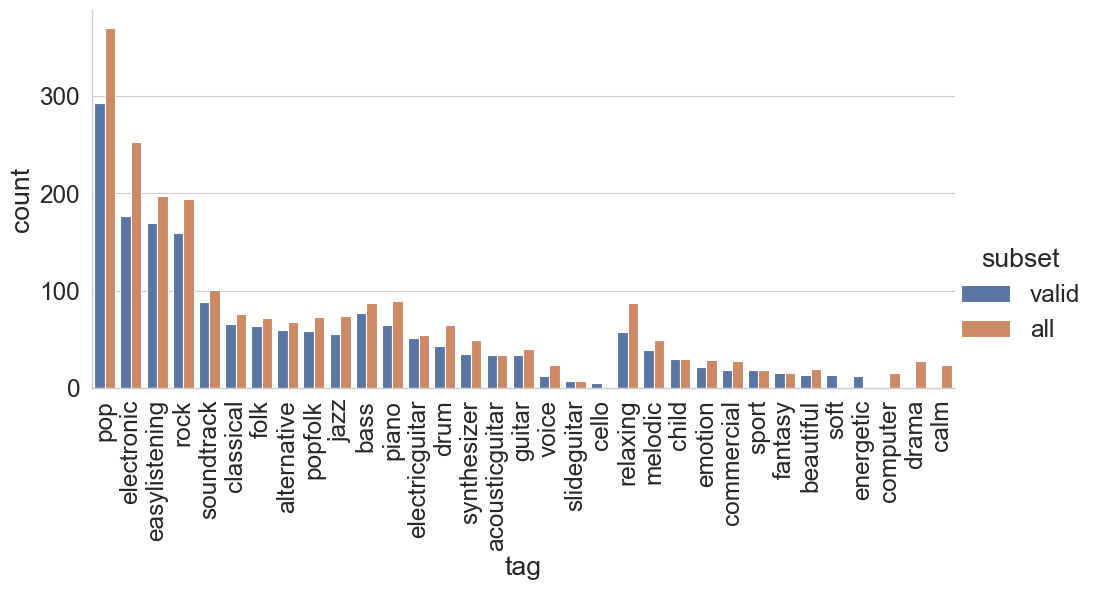

In [20]:
#sns.catplot(data=tags_df, x="tag", kind="count", hue="type", style="valid_subset", height=5, aspect=2)
g = sns.catplot(data=plot_data, x="tag", y="count", kind="bar", hue="subset", height=5, aspect=2)
g.set_xticklabels(rotation=90)

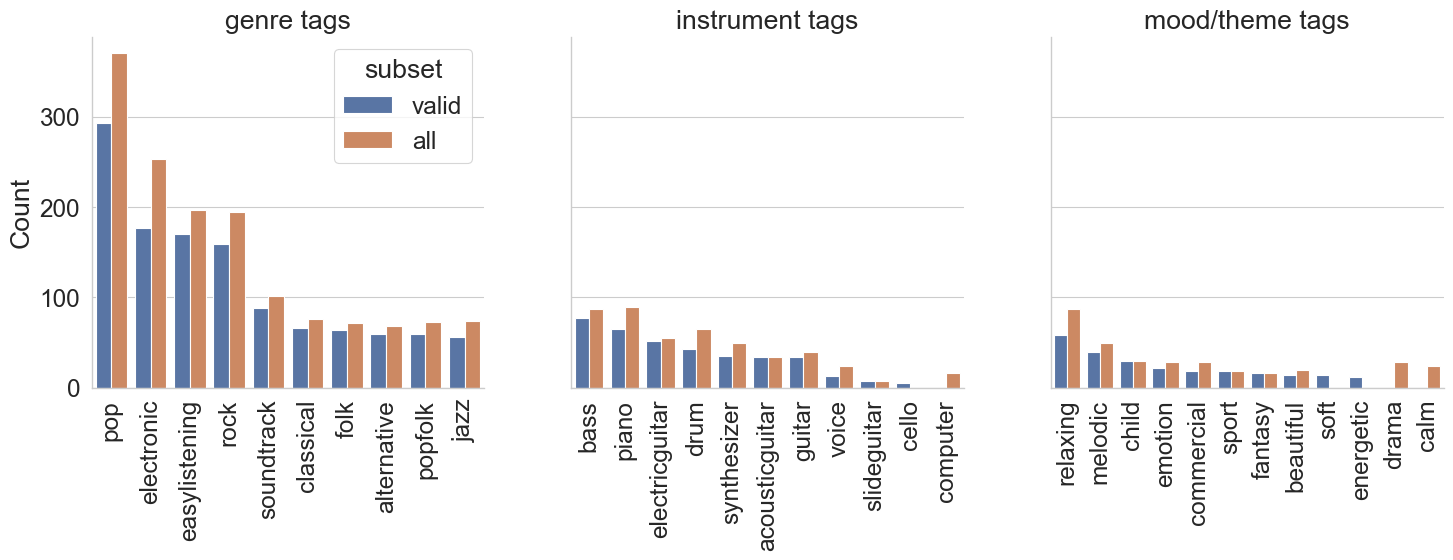

In [21]:
g = sns.catplot(data=plot_data, x="tag", y="count", kind="bar", hue="subset", col="type", sharex=False, sharey=True, legend_out=False)
g.set_xticklabels(rotation=90)
g.set_axis_labels("", "Count")
g.set_titles("{col_name} tags")

/var/folders/dm/ry_6v9wd5wdbxhj7bqll13gm0000gn/T/ipykernel_83333/1371822583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_data_all["subset"] = "all"


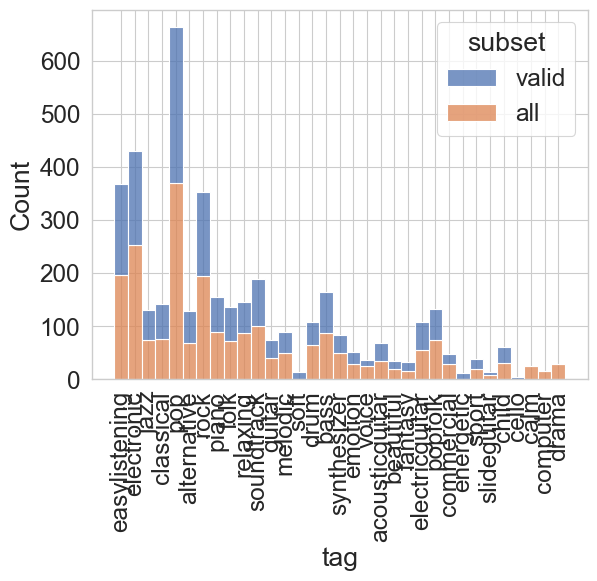

In [22]:
hist_data_valid = tags_df[tags_df["valid_subset"]]
hist_data_valid = hist_data_valid[hist_data_valid["tag"].isin(plot_data_valid["tag"])]
hist_data_valid["subset"] = "valid"
hist_data_all = tags_df[tags_df["tag"].isin(plot_data_all["tag"])]
hist_data_all["subset"] = "all"
hist_data = pd.concat([hist_data_valid, hist_data_all], axis=0)
hist_data.drop(columns=["track", "artist", "album", "file", "duration", "track_id", "valid_subset"], inplace=True)
plot = sns.histplot(data=hist_data, x="tag", hue="subset", multiple="stack")
plot.xaxis.set_tick_params(rotation=90)

### Overlap between annotators

In [23]:
import statistics
import evaluate
rouge_score = evaluate.load("rouge")
bleu_score = evaluate.load("bleu")
meteor_score = evaluate.load("meteor")


bleu_scores = []
meteor_scores = []
rouge_scores = []
multiple_captions = ds.groupby("track_id").filter(lambda x: len(x) > 1)
multiple_captions_grouped = multiple_captions.groupby("track_id")["caption"].apply(list)
for i, row in enumerate(multiple_captions_grouped):
    row = [r.lower() for r in row]  
    predictions = []
    references = []
    for caption in row:
        candidates = [c for c in row if c != caption]
        references.append(candidates)
        predictions.append(caption)

    _bleu_score = bleu_score.compute(predictions=predictions, references=references, max_order=1)["bleu"]
    _meteor_score = meteor_score.compute(predictions=predictions, references=references)["meteor"]
    _rouge_score = rouge_score.compute(predictions=predictions, references=references)["rougeL"]

    bleu_scores.append(_bleu_score)
    meteor_scores.append(_meteor_score)
    rouge_scores.append(_rouge_score)
print(f"ROUGE-L Mean: {statistics.mean(rouge_scores)} - Quantiles: {statistics.quantiles(rouge_scores)}")
print(f"BLEU1 Mean: {statistics.mean(bleu_scores)} - Quantiles: {statistics.quantiles(bleu_scores)}")
print(f"METEOR Mean: {statistics.mean(meteor_scores)} - Quantiles: {statistics.quantiles(meteor_scores)}")

[nltk_data] Downloading package wordnet to /Users/benno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/benno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/benno/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


ROUGE-L Mean: 0.1831739395742986 - Quantiles: [0.1387329591018444, 0.18181818181818182, 0.2394871794871795]
BLEU1 Mean: 0.2610373582978733 - Quantiles: [0.1797979797979798, 0.2653061224489796, 0.34248120300751883]
METEOR Mean: 0.1672562582308452 - Quantiles: [0.10601495368820443, 0.14910176093363547, 0.21899019473042763]


In [24]:
from nltk.translate.meteor_score import align_words, exact_match, stem_match
from nltk.tokenize import word_tokenize
from itertools import combinations
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stopwords = stopwords.words("english")
stopwords = stopwords + [".", ",", ";", "( ", ")", "'s"]

matched_words = []
matched_words_exact = []
matched_words_stem = []
matched_content_words = []
for i, row in enumerate(multiple_captions_grouped):
    for hypo, ref in combinations(row, 2):
        hypo, ref = (word_tokenize(r.lower()) for r in (hypo, ref))      
        #print(hypo, ref)
        #print(align_words(hypo, ref))
        matched, _, _ = align_words(hypo, ref)
        matched_words.extend(hypo[index_h] for index_h, _ in matched)
        matched_words.extend(ref[index_r] for _, index_r in matched)
        content_word_matched = False
        for match in matched:
            if hypo[match[0]] not in stopwords or ref[match[1]] not in stopwords:
                content_word_matched = True
                break
        matched_content_words.append(content_word_matched)
        matched_exact, _, _ = exact_match(hypo, ref)
        matched_words_exact.extend(hypo[index_h] for index_h, _ in matched_exact)
        matched_stem, _, _ = stem_match(hypo, ref)
        matched_words_stem.extend(stemmer.stem(hypo[index_h]) for index_h, _ in matched_stem)
    # print(matched_words)
Counter(word for word in matched_words_exact if word not in stopwords).most_common(30)

[('song', 73),
 ('guitar', 42),
 ('male', 30),
 ('track', 24),
 ('female', 23),
 ('pop', 21),
 ('piano', 20),
 ('rock', 13),
 ('acoustic', 13),
 ('electronic', 10),
 ('instrumental', 9),
 ('synth', 9),
 ('voice', 9),
 ('vocals', 8),
 ('drum', 7),
 ('beat', 7),
 ('hip-hop', 6),
 ('electric', 6),
 ('chorus', 5),
 ('drums', 5),
 ('solo', 4),
 ('jazz', 4),
 ('bass', 4),
 ('rap', 4),
 ('featuring', 3),
 ('french', 3),
 ('guitars', 3),
 ('repetitive', 3),
 ('ballad', 3),
 ('singer', 2)]

In [25]:
Counter(word for word in matched_words if word not in stopwords).most_common(30)

[('song', 161),
 ('guitar', 95),
 ('male', 60),
 ('track', 48),
 ('pop', 46),
 ('female', 46),
 ('piano', 41),
 ('vocals', 34),
 ('rock', 26),
 ('acoustic', 26),
 ('beat', 25),
 ('instrumental', 24),
 ('voice', 22),
 ('electronic', 20),
 ('vocal', 20),
 ('hip-hop', 20),
 ('synth', 19),
 ('drums', 18),
 ('drum', 17),
 ('guitars', 17),
 ('rap', 17),
 ('electric', 12),
 ('chorus', 10),
 ('solo', 9),
 ('featuring', 9),
 ('jazz', 8),
 ('bass', 8),
 ('instruments', 7),
 ('singer', 7),
 ('sounds', 6)]

In [26]:
Counter(word for word in matched_words_stem if word not in stopwords).most_common(30)

[('song', 73),
 ('guitar', 56),
 ('male', 30),
 ('track', 24),
 ('femal', 23),
 ('pop', 21),
 ('vocal', 20),
 ('piano', 20),
 ('instrument', 16),
 ('drum', 15),
 ('rock', 13),
 ('acoust', 13),
 ('voic', 13),
 ('electron', 10),
 ('synth', 10),
 ('beat', 9),
 ('featur', 7),
 ('hip-hop', 6),
 ('electr', 6),
 ('thi', 6),
 ('solo', 5),
 ('choru', 5),
 ('rap', 5),
 ('sound', 4),
 ('jazz', 4),
 ('bass', 4),
 ('feel', 4),
 ('singer', 3),
 ('french', 3),
 ('music', 3)]

In [27]:
Counter(matched_content_words)

Counter({True: 234, False: 41})

## Facets/Aspects

In [28]:
all_content_stems = []
stem_map = defaultdict(set)
for caption in ds["tokenized"]:
    cnt_wrds = [word for word in caption if word not in stopwords]
    for word in cnt_wrds:
        stemmed_word = stemmer.stem(word)
        stem_map[stemmed_word].add(word.lower())
        all_content_stems.append(stemmed_word)

cnt_wrd_ctr = Counter(all_content_stems)
cnt_wrd_ctr.most_common(250)

[('song', 358),
 ('guitar', 251),
 ('track', 162),
 ('vocal', 159),
 ('male', 143),
 ('instrument', 141),
 ('piano', 127),
 ('drum', 109),
 ('rock', 106),
 ('music', 99),
 ('featur', 94),
 ('feel', 81),
 ('synth', 81),
 ('pop', 81),
 ('voic', 79),
 ('electron', 78),
 ('acoust', 78),
 ('sound', 74),
 ('beat', 70),
 ('melodi', 60),
 ('femal', 58),
 ('play', 57),
 ('piec', 55),
 ('use', 49),
 ('electr', 45),
 ('start', 44),
 ('like', 44),
 ('vibe', 42),
 ('bass', 42),
 ('energet', 39),
 ('sing', 38),
 ('solo', 37),
 ('upbeat', 37),
 ('lead', 36),
 ('slow', 36),
 ('accompani', 35),
 ('classic', 35),
 ('make', 35),
 ('french', 34),
 ('danc', 33),
 ('background', 33),
 ('percuss', 32),
 ('give', 31),
 ('singer', 31),
 ('relax', 30),
 ('calm', 30),
 ('lyric', 29),
 ('back', 28),
 ('style', 28),
 ('string', 27),
 ('posit', 26),
 ('riff', 26),
 ('folk', 26),
 ('sad', 26),
 ('chord', 25),
 ('happi', 25),
 ('jazz', 25),
 ('rhythm', 24),
 ('soft', 24),
 ('ambient', 24),
 ('choru', 24),
 ('progress

In [29]:
stem_count_df = pd.DataFrame.from_records(
    [(word, count, stem_map[word]) for word, count in cnt_wrd_ctr.most_common()],
    columns=["stem", "count", "mapped"],
)
stem_count_df.to_csv("stem_count.csv", index=False)

In [30]:
print(len(cnt_wrd_ctr))
print(len(list((word, freq) for word, freq in cnt_wrd_ctr.items() if freq > 10)))


1498
137


In [31]:
stem_facet_df = pd.read_csv("data/stem_facets.csv")
stem2facet = stem_facet_df.set_index("stem")["top_facets"].to_dict()
stem_count_df["top_facets"] = stem_count_df["stem"].map(stem2facet)

In [32]:
facet_counts = stem_count_df[stem_count_df["count"] >= 10].groupby(["top_facets"]).sum()
facet_counts = facet_counts.sort_values(by='count', ascending=False)
facet_counts["percentage"] = facet_counts["count"] / facet_counts["count"].sum() * 100

/var/folders/dm/ry_6v9wd5wdbxhj7bqll13gm0000gn/T/ipykernel_83333/1824866257.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  facet_counts = stem_count_df[stem_count_df["count"] >= 10].groupby(["top_facets"]).sum()


([<matplotlib.patches.Wedge at 0x12750ced0>,
 [Text(0.8359629966470838, -1.293354502151992, 'Other'),
  Text(-1.4461798546044506, -0.5293050426136617, 'Instrumentation'),
  Text(-0.6231773930945486, 1.4082790691961173, 'Structure'),
  Text(0.9257656556730371, 1.23067377918613, 'Genre/Style'),
  Text(1.4304008361298395, 0.5705729120796537, 'Mood'),
  Text(1.533310187334519, 0.14338713127816569, 'Texture')],
 [Text(0.379983180294129, -0.5878884100690873, '32%'),
  Text(-0.6573544793656593, -0.24059320118802804, '25%'),
  Text(-0.283262451406613, 0.6401268496345988, '23%'),
  Text(0.4208025707604714, 0.5593971723573318, '11%'),
  Text(0.6501821982408361, 0.2593513236725698, '6%'),
  Text(0.696959176061145, 0.06517596876280259, '3%')])

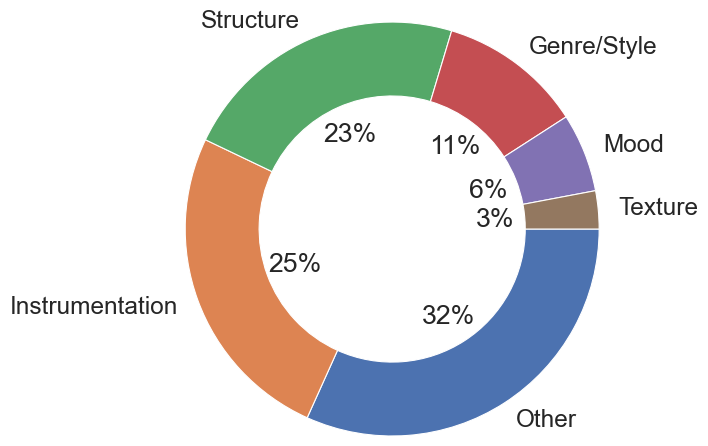

In [33]:
plt.pie(facet_counts["count"], labels=facet_counts.index, colors=sns.color_palette(), autopct="%.0f%%", counterclock=False, radius=1.4, pctdistance=0.5, wedgeprops=dict(width=0.5))

## MusicCaps

In [34]:
mc = pd.read_csv("data/musiccaps-public.csv")

In [35]:
mc["tokenized"] = mc["caption"].str.lower().apply(word_tokenize)

In [36]:
sentence_lengths = mc["tokenized"].apply(len)
sentence_lengths.describe()

count    5521.000000
mean       54.843507
std        18.755525
min         4.000000
25%        42.000000
50%        53.000000
75%        66.000000
max       151.000000
Name: tokenized, dtype: float64

In [37]:
vocab_size = len(set([word for caption in mc["tokenized"] for word in caption]))
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 6144


In [38]:
trigrams = [trigram for caption in mc["tokenized"] for trigram in zip(caption, caption[1:], caption[2:])]
print(f"Most common trigrams: {pd.Series(trigrams).value_counts().head(20)}")


Most common trigrams: (the, song, is)                   1581
(., this, song)                   1566
(., the, song)                    1507
(., there, is)                    1220
(the, low, quality)               1208
(low, quality, recording)         1205
(quality, recording, features)    1181
(in, the, background)             1119
(there, is, a)                    1077
(recording, features, a)           993
(., it, sounds)                    938
(may, be, playing)                 797
(., the, tempo)                    785
(song, may, be)                    776
(this, song, may)                  770
(the, tempo, is)                   769
(this, is, a)                      746
(., this, is)                      682
(., there, are)                    625
(instrumental, ., the)             562
dtype: int64
